In [ ]:
# Downloading all necessary libraries.. uncomment if you don't have them installed 
# !pip install numpy scikit-learn matplotlib

In [25]:
from sklearn.datasets import make_moons # only imported to create the Dataset
import matplotlib.pyplot as plt
import numpy as np
import copy

In [29]:
# we will use this function later to plot the decision boundary after finishing the model.
def plot_decision_boundary(model_func, X, Y):

    # Set min and max values and give some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    grid_points = np.c_[xx.ravel(), yy.ravel()].T  # shape (2, number_of_points)
    Z = model_func(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot contour and training examples
    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.7)
    plt.scatter(X[0, :], X[1, :], c=Y[0], cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

### Creating our moons dataset

Before we start, we should view our dataset and get insights about it.

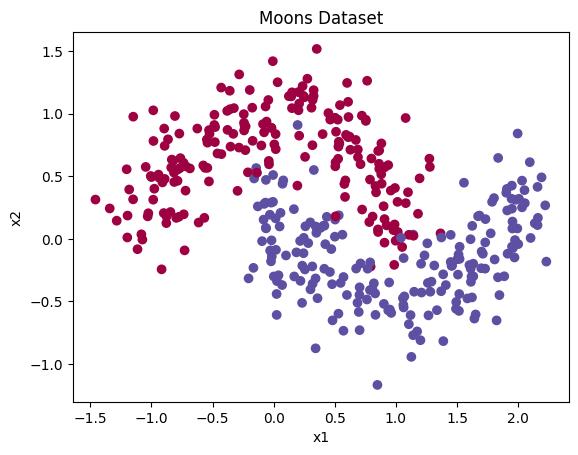

In [11]:
# The input and the labels
X, Y = make_moons(n_samples=400, noise=0.2)
X = X.T # transposes the X.shape to be (dim,m)
Y = Y.reshape(1, -1) #transposes the Y.shape to be (dim,m)

# Visualizing the data
plt.scatter(X[0, :], X[1, :], c=Y[0], cmap=plt.cm.Spectral)
plt.title("Moons Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [12]:
# lets explore our data more: 
input_shape = X.shape
label_shape = Y.shape
m = X.shape[1]       # number of samples

print ('The shape of X is: ' + str(input_shape))
print ('The shape of Y is: ' + str(label_shape))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [13]:
def layer_size(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = X.shape[0] # dim
    n_h = 5  # lets use 5 hidden layers
    n_y = Y.shape[0]

    return (n_x , n_h , n_y)

### Parameter Initialization

We initialize the weights and biases for each layer of the neural network. Here, weights are initialized with small random values and biases are set to zero.


In [14]:
def initialize_parameters(n_x,n_h,n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of the first layer of shape (n_h, n_x)
                    b1 -- bias vector of the first layer of shape (n_h, 1)
                    W2 -- weight matrix of the second layer of shape (n_y, n_h)
                    b2 -- bias vector of  the second layer of shape (n_y, 1)
    """   

    W1 = np.random.randn(n_h,n_x) * 0.01  # we multiply by 0.01 because we will use the tanh() 
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)* 0.01
    b2 = np.zeros((n_y,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [15]:
# Logistic Regression sigmoid function for the final output layer
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1/ (1+np.exp(-z))

    return s

### Forward Propagation

This function performs a forward pass through the neural network: computing activations for the hidden and output layers using the initialized parameters.


In [16]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Access each parameter from the dict "parameters"
    W1 = parameters["W1"]  #shape (n_h,n_x)
    b1 = parameters["b1"]  #shape (n_h,1)
    W2 = parameters["W2"]  #shape (n_y,n_h)
    b2 = parameters["b2"]  #shape (n_y,1)

    Z1 = (np.dot(W1,X)+b1)
    A1 = np.tanh(Z1)
    Z2 = (np.dot(W2,A1) + b2)
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

### Compute Cost

After forward propagation, we compute the binary cross-entropy cost to measure how well the current predictions match the true labels.


In [17]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    
    """

    m = Y.shape[1] # number of examples

    # we can use 2 approaches to do that 1 to use np.multiply() and np.sum() or to use np.dot() directly .
    # here I will use the np.multiply() and np.sum()

    loglos = (1/m)*(np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y))
    cost = - np.sum(loglos)

    # the other approach was that:
    ## cost = -(np.dot(Y.T, np.log(A2)) + np.dot((1 - Y).T, np.log(1 - A2))) / m

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # e.g., turns [[17]] into 17 
    
    return cost


### Backward Propagation

This step computes the gradients of the cost with respect to the parameters. These gradients are used to update the parameters and reduce the cost.


In [20]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1] # number of examples

    # Access each parameter from the dict "parameters" and "cache"
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache['A1']
    A2 = cache['A2']

     # Backward propagation: calculate dldW1, dldb1, dldW2, dldb2.

    dldZ2 = A2 - Y
    dldW2 = np.dot(dldZ2,A1.T)/m
    dldb2 = np.sum(dldZ2,axis =1,keepdims= True)/m
    dldZ1 = np.dot(W2.T,dldZ2)*(1 - np.power(A1, 2))
    dldW1 = (np.dot(dldZ1,X.T))/m
    dldb1 = np.sum(dldZ1,axis =1, keepdims = True)/m

    grads = {"dW1": dldW1,
             "db1": dldb1,
             "dW2": dldW2,
             "db2": dldb2}
    
    return grads



### Update Parameters

Using the gradients computed in the backward step, we update weights and biases via gradient descent to improve the model.


- Use `copy.deepcopy(...)` when copying lists or dictionaries that are passed as parameters to functions. To avoid input parameters from being updated within the function.

In [21]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    W1 = copy.deepcopy(parameters["W1"]) # using deepcopy 
    b1 = parameters["b1"]
    W2 = copy.deepcopy(parameters["W2"]) # using deepcopy 
    b2 = parameters["b2"]

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"] 
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### Putting It All Together – Train the Neural Network

This function ties everything together: it initializes parameters, then iteratively performs forward and backward propagation, updating the parameters to minimize the cost.


In [ ]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    # Initialize parameters
    parameters = initialize_parameters(X.shape[0], n_h, Y.shape[0])


    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)

        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

### Predict Function

This function uses the learned parameters to make predictions on new data. It applies forward propagation and thresholds the output to get binary predictions.


In [ ]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

### Train the Neural Network on the Dataset

We now train our shallow neural network with the specified hidden layer size using the `nn_model()` function.


Cost after iteration 0: 0.693141
Cost after iteration 1000: 0.257534
Cost after iteration 2000: 0.066717
Cost after iteration 3000: 0.063780
Cost after iteration 4000: 0.061884
Cost after iteration 5000: 0.060491
Cost after iteration 6000: 0.059469
Cost after iteration 7000: 0.058708
Cost after iteration 8000: 0.058125
Cost after iteration 9000: 0.057665


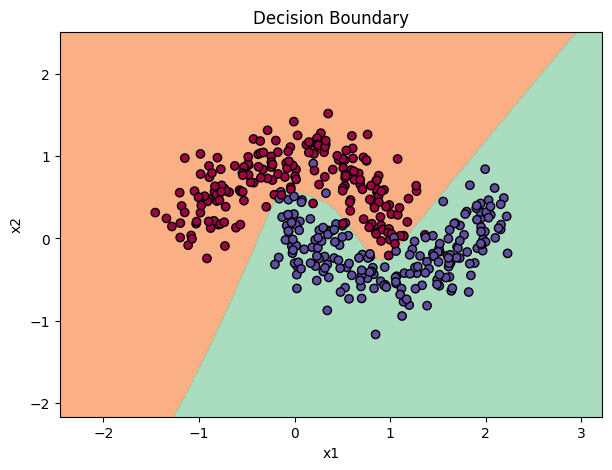

In [38]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 5, num_iterations = 10000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x), X, Y)


### Evaluate Model Accuracy

We use the trained model to make predictions and compute the classification accuracy on the training data.


In [37]:
# now lets see the accuracy:
predictions = predict(parameters, X)
accuracy = ((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / Y.size).item() * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 97.50%


### ✅ Final Remarks

Our shallow neural network successfully learned a non-linear decision boundary and achieved an impressive accuracy of **97.5%** on the training set. This result confirms that even a simple neural network with one hidden layer can effectively classify complex datasets like `make_moons`. 

Next steps could include experimenting with different hidden layer sizes, adding more layers, or testing on different datasets to further enhance the model's capabilities.
